# Descubrimiento computacional de fármacos

 RESUMEN

*  Parte 1: Conseguir datos, descargar de ChEMBL BBDD y pre-procesado de los datos de bioactividad. El dataset contiene compuestos (moleculas) cuya actividad ha sido analizados biologicamente  para medir como interactuan con otros organismos/proteinas de interés que serán los posibles objetivos (targets) . La proteina objetivo en este caso es Acetylcholinesterase
 
* Parte 2: Cálculo de los descriptores de Lipinski (Lipinski descriptors) los cuales miden la probabilidad de las moleculas de poder ser usadas cómo fármacos. También hago un análisis exploratorio de los datos de los descriptores de Lipinski. Este análisis consiste en gráficos de caja y gráficos de dispersión para ver las diferencias entre los conjuntos de compuestos con distinta bioactividad (active VS inactive) 

* Parte 3 : Usando el software PaDEL calcúlo los descriptores moleculares cuantitativos y preparo el dataset (X & Y) que usaré para construir los modelos predictivos. 

* Parte 4: Usando los descriptores moleculares calculados (variable X)) creo un modelo de regresión Random Forest para predecir los valores pIC50 (variable Y)

* Parte 5: Construir y comparar varios modelos de regresión (quantitative structure-activity relationship or QSAR) para los inibidores de la  proteina Acetylcholinesterase usando la libreria lazypredict


### 1. Base de datos ChEMBL 
La base de datos ChEMBL contiene datos organizados sobre la bioactividad de más de 2 millones de compuestos químicos. Está compuesta de 76.000 documentos, 1.2 millones de ensayos y los datos se exapnden a 13.000 targets(objetivos) , 1800 células y 33000 indicaciones [ChEMBL](https://www.ebi.ac.uk/chembl/)

In [ ]:
pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 636 kB 17.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.0.1 which is incompatible.


# Importar las librerias

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

# Buscar la proteina objetivo (Target) 

## Proteina objetivo: acetylcholinesterase

In [ ]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,27.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,17.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
4,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
5,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
6,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
7,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913
8,[],Anopheles gambiae,Acetylcholinesterase,15.0,False,CHEMBL2046266,"[{'accession': 'Q869C3', 'component_descriptio...",SINGLE PROTEIN,7165
9,[],Bemisia tabaci,AChE2,15.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038


###  Seleccionamos y obtenemos la bioactividad para la proteina for Human Acetylcholinesterase  (Primera entrada)

Asignamos la primera entrada que corresponde a la proteina Human Acetylcholinesterase a la variable selected_target

In [ ]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL220'

Ahora, obtendremos sólo los datos de bioactividad para dicha proteina. Es necesario resaltar que estos datos siguen el estandard IC50 y están en la unidad de nanomoles (nM)

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id = selected_target).filter(standard_type = "IC50")


In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,None,None,CHEMBL1148382,J. Med. Chem.,2004.0,"{'bei': '19.61', 'le': '0.36', 'lle': '3.32', ...",CHEMBL133897,None,CHEMBL133897,6.12,False,http://www.openphacts.org/units/Nanomolar,252547,=,1,True,=,None,IC50,nM,None,750.0,CHEMBL220,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,None,None,CHEMBL1148382,J. Med. Chem.,2004.0,"{'bei': '18.57', 'le': '0.38', 'lle': '2.45', ...",CHEMBL336398,None,CHEMBL336398,7.00,False,http://www.openphacts.org/units/Nanomolar,252533,=,1,True,=,None,IC50,nM,None,100.0,CHEMBL220,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,None,None,CHEMBL1148382,J. Med. Chem.,2004.0,None,CHEMBL131588,None,CHEMBL131588,None,False,http://www.openphacts.org/units/Nanomolar,252530,>,1,True,>,None,IC50,nM,None,50000.0,CHEMBL220,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0


Para terminar he salvado los datos de bioactividad en un fichero csv que he llamado acetyl_bioactivity_data.csv

In [ ]:
df.to_csv("bioactivity_data.csv", index = False)

## Copiando los ficheros al Google Drive

Primero, he montado el Google Drive al notebook de Colab para tener acceso al Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount =True)

Mounted at /content/gdrive/


Ahora he creado una carpeta para datos en Colab Notebooks en la carpeta de Google Drive

In [ ]:
!mkdir "/content/gdrive/MyDrive/Colab Notebooks/data"

mkdir: cannot create directory ‘/content/gdrive/Mi unidad/Colab Notebooks/data2’: No such file or directory


In [ ]:
!cp bioactivity_data.csv "/content/gdrive/MyDrive/Colab Notebooks/data"

In [ ]:
!ls -l "/content/gdrive/MyDrive/Colab Notebooks/data"

total 975
-rw------- 1 root root  70334 Jul 24 16:19 bioactivity_data.csv
-rw------- 1 root root  10578 Jul 24 16:19 bioactivity_preprocessed_data.csv
-rw------- 1 root root 916035 Jul 25 11:39 final_df_ipc50.csv


Miro si el csv se ha creado correctamente

In [ ]:
!ls 

drive  gdrive  padel.sh  padel.zip  sample_data


In [ ]:
!head bioactivity_data.csv

head: cannot open 'bioactivity_data.csv' for reading: No such file or directory


# Preprocesado de los datos de bioactividad

# Tratando valores nulos

Si alguno de los compuestos tiene valores nulos en la columna standard_value, lo elimino

In [ ]:
df2 = df[df.standard_value.notna()]
df2.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,None,None,CHEMBL1148382,J. Med. Chem.,2004.0,"{'bei': '19.61', 'le': '0.36', 'lle': '3.32', ...",CHEMBL133897,None,CHEMBL133897,6.12,False,http://www.openphacts.org/units/Nanomolar,252547,=,1,True,=,None,IC50,nM,None,750.0,CHEMBL220,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,None,None,CHEMBL1148382,J. Med. Chem.,2004.0,"{'bei': '18.57', 'le': '0.38', 'lle': '2.45', ...",CHEMBL336398,None,CHEMBL336398,7.00,False,http://www.openphacts.org/units/Nanomolar,252533,=,1,True,=,None,IC50,nM,None,100.0,CHEMBL220,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,None,None,CHEMBL1148382,J. Med. Chem.,2004.0,None,CHEMBL131588,None,CHEMBL131588,None,False,http://www.openphacts.org/units/Nanomolar,252530,>,1,True,>,None,IC50,nM,None,50000.0,CHEMBL220,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,None,None,CHEMBL1148382,J. Med. Chem.,2004.0,"{'bei': '16.11', 'le': '0.34', 'lle': '1.81', ...",CHEMBL130628,None,CHEMBL130628,6.52,False,http://www.openphacts.org/units/Nanomolar,252534,=,1,True,=,None,IC50,nM,None,300.0,CHEMBL220,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,None,None,CHEMBL1148382,J. Med. Chem.,2004.0,"{'bei': '17.60', 'le': '0.36', 'lle': '3.00', ...",CHEMBL130478,None,CHEMBL130478,6.10,False,http://www.openphacts.org/units/Nanomolar,252552,=,1,True,=,None,IC50,nM,None,800.0,CHEMBL220,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


In [ ]:
print(len(df))
print(len(df2))

Aparentemente había aprox 1207 valores nulos

Tambien elimino las filas repetidas de la variable canonical_smiles

In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

Ahora hemos eliminado 1238 duplicados

In [ ]:
print(len(df2))
print(len(df2_nr))

## Etiqueto los compuestos como activo, inactivo o intermedio según su bioactividad

Los datos de bioactividad son valores IC50 (Concentración para la inhibición de 50%) . Los compuestos con valores inferiores a 1000 nM se consideran ACTIVOS. Los que tengan valores superiores a 10000 nM se consideran INACTIVOS. Los compuestos entre ambos valores (mayores que 1000 e inferiores a 10000) son INTERMEDIOS.

In [ ]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <=1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

### Combinar las 3 columnas que contienen la información en un *DataFrame*



*   molecule_chembl_id
*   canonical_smiles
*   standard_value

### Itero la variable molecule_chembl_id en una lista

In [ ]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

### Itero canonical_smiles en una lista

In [ ]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

### Itero standard_value en una lista

In [ ]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

### Combino las 4 listas  en un  DataFrame

In [ ]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3_0 = pd.DataFrame(data_tuples, columns = ["molecule_chembl_id" ,"canonical_smiles","bioactivity_class","standard_value"])
df3_0.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,800.0


Salvo el DataFrame en un csv

In [ ]:
df3_0.to_csv("bioactivity_preprocessed_data.csv",index = False)


NameError: ignored

In [ ]:
!cp bioactivity_preprocessed_data.csv "/content/gdrive/MyDrive/Colab Notebooks/data"

In [ ]:
!ls -l

ls: cannot access 'drive': Transport endpoint is not connected
total 25180
d????????? ? ?    ?           ?            ? drive
drwx------ 5 root root     4096 Jul 25 15:28 gdrive
-rw-r--r-- 1 root root      231 Jul 25 15:22 padel.sh
-rw-r--r-- 1 root root 25768637 Jul 25 15:22 padel.zip
drwxr-xr-x 1 root root     4096 Jul 16 13:20 sample_data


In [ ]:
!ls "/content/gdrive/MyDrive/Colab Notebooks/data"

bioactivity_data.csv  bioactivity_preprocessed_data.csv  final_df_ipc50.csv


In [ ]:
!head bioactivity_preprocessed_data.csv

molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,750.0
CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,100.0
CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,50000.0
CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,300.0
CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,800.0
CHEMBL130112,CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1,intermediate,2400.0
CHEMBL130098,CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C,active,100.0
CHEMBL337486,CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCOCC1,inactive,50000.0
CHEMBL336538,COc1ccc(-c2nc(SC)n(C(=O)N(C)C)n2)cc1,active,800.0


# 2. Analisis exploratorio de datos

En esta sección calculo los Descriptores y hago un análisis exploratorio de los datos.


Instalo conda y rdkit

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-07-25 12:05:17--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   170MB/s    in 0.5s    

2021-07-25 12:05:17 (170 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

Cargar los datos de bioactividad

In [ ]:
import pandas as pd

In [ ]:
#df = pd.read_csv("bioactivity_preprocessed_data.csv")

### Calcular los descriptores de  Lipinski (Lipinski descriptors)

Christopher Lipinski, es un científico en Pfizer, que estableció una serie de reglas para evaluar la efectividad de un fármaco. Esta efectividadsebasa en el perfil farmacokinetico también conocido como ADME por sus siglas en inglés (Absorption, Distribution, Metabolism, & Extraction). Este científico analizó todos los fármacos activos de via oral aprovado por la FDA americana y estabeció lo que se conoce como the Rule-of-Five of Lipinski's Rule

The Lipinski's Rule dice lo siguiente:
 

*   El peso molecular (MW) <500 Dalton
*   EL coefficiente de particion Octanol-agua (LogP)<5 

*   Enlaces de hidrogeno donantes  <5
*   Enlaces de hidrógeno aceptadores <10

(Todos los valores son multiplos de 5)



### Importar librerias

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

Calcular descriptores

Esta función modificada fue obtenida de esta fuente:https://codeocean.com/explore/capsules?query=tag:data-curation

In [ ]:
df3_0= pd.read_csv("bioactivity_preprocessed_data.csv")

In [ ]:
# Inspired by https://codeocean.com/explore/capsules?query=tag:data-curation
"""
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors """

In [ ]:
pd.set_option('max_rows', 99999)

In [ ]:
df3_0.dropna(inplace = True)

In [ ]:
df3_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6340 entries, 0 to 6341
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  6340 non-null   object 
 1   canonical_smiles    6340 non-null   object 
 2   bioactivity_class   6340 non-null   object 
 3   standard_value      6340 non-null   float64
dtypes: float64(1), object(3)
memory usage: 247.7+ KB


In [ ]:
df3_0.iloc[1850,:]

molecule_chembl_id                                          CHEMBL1678
canonical_smiles      COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2.Cl
bioactivity_class                                               active
standard_value                                                    11.6
Name: 1851, dtype: object

In [ ]:
smiles = df3_0.canonical_smiles


In [ ]:
moldata= []
i= 0
for elem in smiles:
        print(elem)
        print(i)
        i = i+1
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

        


Streaming output truncated to the last 5000 lines.
CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2.Cl
3840
CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2.Cl
3841
CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(N)c3[C@H](C1)C2
3842
COc1cc2[nH]c(=O)c(C(=O)NCC3CCN(Cc4ccccc4)CC3)c(O)c2cc1OC
3843
O=C(NCC1CCN(Cc2ccccc2)CC1)c1c(O)c2cc(O)c(O)cc2[nH]c1=O
3844
O=C(/C=N/O)Nc1ccc[n+](CC[n+]2cccc(NC(=O)/C=N/O)c2)c1.[Br-].[Br-]
3845
O=C(/C=N\O)Nc1ccc[n+](CCC[n+]2cccc(NC(=O)/C=N\O)c2)c1.[Br-].[Br-]
3846
O=C(/C=N\O)Nc1ccc[n+](CCCC[n+]2cccc(NC(=O)/C=N\O)c2)c1.[Br-].[Br-]
3847
O=C(/C=N\O)Nc1ccc[n+](CCCCC[n+]2cccc(NC(=O)/C=N\O)c2)c1.[Br-].[Br-]
3848
O=C(/C=N\O)Nc1ccc[n+](CCCCCC[n+]2cccc(NC(=O)/C=N\O)c2)c1.[Br-].[Br-]
3849
O=C(/C=N\O)Nc1ccc[n+](CCCCCCC[n+]2cccc(NC(=O)/C=N\O)c2)c1.[Br-].[Br-]
3850
O=C(/C=N/O)Nc1ccc[n+](Cc2ccccc2C[n+]2cccc(NC(=O)/C=N/O)c2)c1.[Br-].[Br-]
3851
O=C(/C=N/O)Nc1ccc[n+](Cc2cccc(C[n+]3cccc(NC(=O)/C=N/O)c3)c2)c1.[Br-].[Br-]
3852
O=C(/C=N/O)Nc1ccc[n+](Cc2ccc(C[n+]3cccc(NC(=O)/C=N/O)c3)cc2)c1.[Br-].[Br-]
3853
C[n+

In [ ]:
baseData= np.arange(1,1)
i=0  
for mol in moldata:
  desc_MolWt = Descriptors.MolWt(mol)
  desc_MolLogP = Descriptors.MolLogP(mol)
  desc_NumHDonors = Lipinski.NumHDonors(mol)
  desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
  row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
  if(i==0):
      baseData=row
  else:
      baseData=np.vstack([baseData, row])
  i=i+1      
    
columnNames=["MW","LogP","NumHDonors","NumHAcceptors"] 
descriptors = pd.DataFrame(data=baseData,columns=columnNames)

In [ ]:
descriptors.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0


In [ ]:
df_lipinski = descriptors

Combinando DataFrame

Voy a mirar los dos DataFrames que voy a combinar


In [ ]:
df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0


In [ ]:
df3_0.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,800.0


Combino los dos DataFrames

In [ ]:
df_combined = pd.concat([df3_0,df_lipinski], axis = 1)

NameError: ignored

In [ ]:
df_combined.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,750.0,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,100.0,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,50000.0,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,300.0,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,800.0,346.334,3.0953,0.0,6.0


## Convertir IC50 a pIC50

Para que la distribución de los datos de la variable `standard_value `  (IC50) sea más homogénea uso una transformación logartimica negativa

Esta función toma como input un DataFrame y hace lo siguiente: 

* Toma los valores IC50 de la columna `standard_value ` y lo convierte de nM a M multiplicando por  10^-9. 

* Aplicamos el valor -log10 al valor molar

* Eliminar la columna standard value y crea pIC50



In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Es importante señalar que los valores mayores que 100.000.000 al aplicar la transformación logartimica negativa se convierten en valores negativos y dificulta su interpretación. Por eso estos valores voy a fijarlos en 100000000


In [ ]:
-np.log10((10**-9)* 100000000)

1.0

In [ ]:

-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
ser1 = df_combined["standard_value"]
print(type(ser1))

<class 'pandas.core.series.Series'>


In [ ]:
standard_value_num = pd.to_numeric(ser1, errors='coerce')


In [ ]:
df_combined["standard_value"] = standard_value_num

In [ ]:
df_combined.dtypes

molecule_chembl_id     object
canonical_smiles       object
bioactivity_class      object
standard_value        float64
MW                    float64
LogP                  float64
NumHDonors            float64
NumHAcceptors         float64
dtype: object

In [ ]:
def norm_value(input):
  norm = []

  for i in input["standard_value"]:
    if i > 100000000:
      i = 100000000
      norm.append(i)

    input["standard_value_norm"] = norm
    x = input.drop("standard_value",1)

  return x 

Primero aplico la funcion norm_value y luego la transformacion logaritmica negatva 

In [ ]:
df_combined.loc[0,"standard_value"]

750.0

In [ ]:
for i in range(len(df_combined)):
  if (df_combined.loc[i,"standard_value"]) > 100000000:
    df_combined.loc[i,"standard_value_norm"]= df_combined.loc[i,"standard_value"]
    df_combined.loc[i,"standard_value"] = 100000000
  else:
    df_combined.loc[i,"standard_value_norm"] = df_combined.loc[i,"standard_value"]


In [ ]:
df_combined.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,750.0,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,100.0,376.913,4.5546,0.0,5.0,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,50000.0,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,300.0,404.845,4.7069,0.0,5.0,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,800.0,346.334,3.0953,0.0,6.0,800.0


In [ ]:
df_combined.standard_value.describe()

count    6.340000e+03
mean     2.742247e+05
std      4.299092e+06
min      5.000000e-06
25%      8.000000e+01
50%      1.065000e+03
75%      1.100000e+04
max      1.000000e+08
Name: standard_value, dtype: float64

In [ ]:
df_norm = df_combined

Aplicando la trasformación logarítimica negativa despues de haber normalizado los datos

In [ ]:
df_final = pIC50(df_norm)
df_final.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,750.0,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,100.0,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,50000.0,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,300.0,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,800.0,346.334,3.0953,0.0,6.0,6.096910


In [ ]:
df_final.pIC50.describe()

count    6340.000000
mean        6.017448
std         1.689145
min        -7.850000
25%         4.958607
50%         5.972655
75%         7.096910
max        14.301030
Name: pIC50, dtype: float64

Elimino la clase de bioactividad "intermediate" 

In [ ]:
df_2class = df_final[df_final.bioactivity_class != "intermediate"]
df_2class.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,750.0,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,100.0,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,50000.0,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,300.0,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,800.0,346.334,3.0953,0.0,6.0,6.096910


In [ ]:
df_final.to_csv("final_df_ipc50.csv")

### Análisis exploratorio del espacio químico via Lipinski descriptors

Importndo librerias

In [ ]:
import seaborn as sns 
sns.set(style = "ticks")
import matplotlib.pyplot as plt

### Plot de frecuencia de las 2 clases de bioactividad

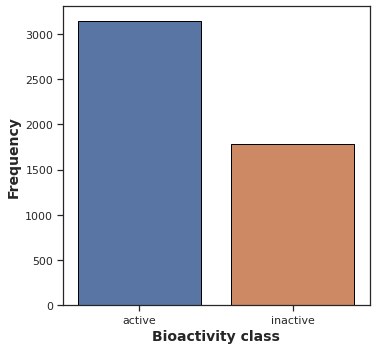

In [ ]:
plt.figure(figsize=(5.5, 5.5))


sns.countplot(x = "bioactivity_class", data = df_2class, edgecolor = "black")

plt.xlabel("Bioactivity class", fontsize = 14, fontweight = "bold")
plt.ylabel("Frequency", fontsize = 14, fontweight = "bold")

plt.savefig("plot_bioactivity_class.pdf")

### Gráfico de dispersión peso molecular (MW - moecular weight) VS LogP ( Solubilidad)

Se ve que las dos clases de bioactividad se expanden aproximadamente por el mismo espaio químico como puede verse en el gráfico de dispersión




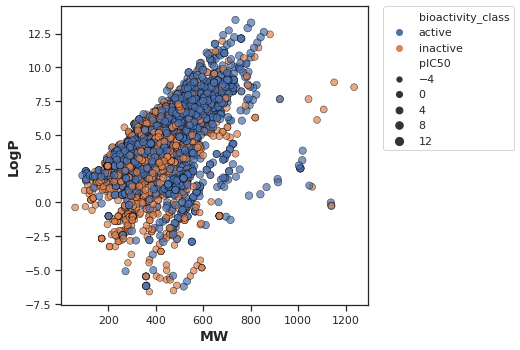

In [ ]:
plt.figure(figsize = (5.5, 5.5))

sns.scatterplot( x = "MW", y = "LogP", data = df_2class, hue ="bioactivity_class", size = "pIC50", edgecolor = "black", alpha = 0.7)

plt.xlabel("MW", fontsize = 14, fontweight = "bold")
plt.ylabel("LogP", fontsize = 14, fontweight = "bold")
plt.legend(bbox_to_anchor = (1.05, 1), loc =2, borderaxespad = 0) #figure legend outside 
plt.savefig("plot_MW_vs_LogP.pdf")

## Gráficos de caja

Gráfico de caja para pIC50 

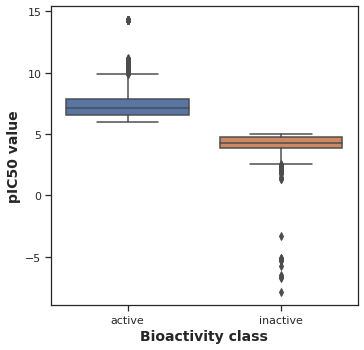

In [ ]:
plt.figure(figsize = (5.5,5.5))

sns.boxplot(x = "bioactivity_class", y = "pIC50", data = df_2class, )

plt.xlabel("Bioactivity class", fontsize = 14, fontweight = "bold")
plt.ylabel("pIC50 value", fontsize = 14, fontweight = "bold")

plt.savefig("plot_ic50.pdf")

Análisis estadístico| Mann-Whitney U Test

La función ha sido  modificada de la fuente: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/



In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

Compara la clase "active" y la clase "inactive" para ver si hay diferencia estadística significatva 
en los valores de la variable pIC50. Por eso aplico la función mannwhitney a la vaiable pIC50

Conclusión: El valor p es muy bajo y por eso rechazamos la hipótesis nula. Significa que las dos clases tienen una distribución diferente.


In [ ]:
mannwhitney("pIC50")

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


Aplico lo mismo al resto de descripores Lipinski

**Peso molcular - MW (Molecular weigth)**

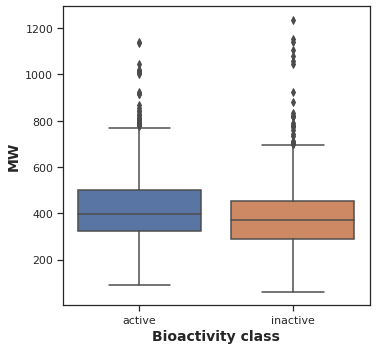

In [ ]:
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x="bioactivity_class", y = "MW",data = df_2class)

plt.xlabel("Bioactivity class", fontsize = 14, fontweight ="bold")
plt.ylabel("MW", fontsize = 14, fontweight = "bold")

plt.savefig("plot_MW.pdf")

Análisis estadístico | Mann-Whitney U Test para Peso molecular - MW (Molecular weigth)


In [ ]:

mannwhitney("MW")

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2368074.5,7.005948e-20,0.05,Different distribution (reject H0)


**LogP  (Solubility)**

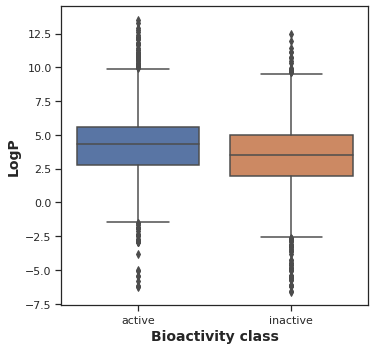

In [ ]:
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x="bioactivity_class", y = "LogP", data = df_2class)

plt.xlabel("Bioactivity class", fontsize = 14, fontweight = "bold")
plt.ylabel("LogP", fontsize = 14, fontweight = "bold")

plt.savefig("plot_LogP.pdf")

Análisis estadístico | Mann-Whitney U Test para LogP

In [ ]:
mannwhitney("LogP")

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2206860.5,1.122125e-35,0.05,Different distribution (reject H0)


### NumHDonors



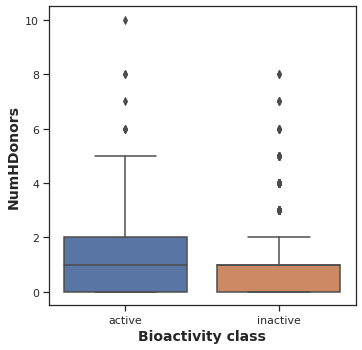

In [ ]:
plt.figure ( figsize= (5.5,5.5))

sns.boxplot(x="bioactivity_class", y= "NumHDonors", data=df_2class)

plt.xlabel("Bioactivity class", fontsize = 14, fontweight = "bold")
plt.ylabel("NumHDonors",fontsize = 14, fontweight = "bold" )
plt.savefig("plot_NumHDonors.pdf")

Análisis estadístico | Mann-Whitney U Test para NumHDonors


In [ ]:
mannwhitney("NumHDonors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2532960.0,1.511152e-09,0.05,Different distribution (reject H0)


### NumHAcceptors

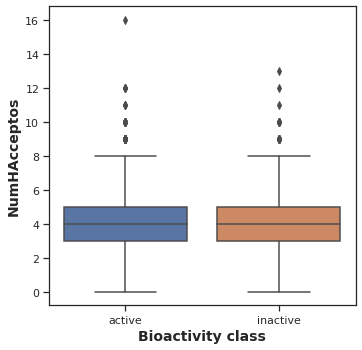

In [ ]:
plt.figure ( figsize= (5.5,5.5))

sns.boxplot(x="bioactivity_class", y= "NumHAcceptors", data=df_2class)

plt.xlabel("Bioactivity class", fontsize = 14, fontweight = "bold")
plt.ylabel("NumHAcceptos",fontsize = 14, fontweight = "bold" )
plt.savefig("plot_NumHAcceptors.pdf")

Análisis estadístico | Mann-Whitney U Test para NumHAcceptors

In [ ]:
mannwhitney("NumHAcceptors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2758827.0,0.177832,0.05,Same distribution (fail to reject H0)


### Interpretación de los resultados estadísticos

* pIC50 values

Mirando los valores de pIC50, las clases active y inactive muestran diferencia estadística significativa, lo cual era de esperar ya que habíamos fijado los valores de umbral previamente para crear las clases. ( IC50 < 1000 nM = Active,  IC50 > 10000 nM = Inactive, corresponde a pIC50 > 6 Actives , and pIC50< 5 = Inactives) 

* Descriptores Lipinski 

De los 4 descriptores (Lipinski's descriptors,MW, LogP, NumHDonors, NumHAcceptors) sólo LogP no muestra diferencia estadística significativa entre clases. Los otros 3 descriptores todos mostraron diferencia estadística significativa entre las clases de bioactividad "active" y "inative"


### *Zip* files 

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

Scanning files ..................
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: bioactivity_preprocessed_data.csv (deflated 83%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: bioactivity_data.csv (deflated 91%)
  adding: final_df_ipc50.csv (deflated 76%)
  adding: mannwhitneyu_LogP.csv (deflated 10%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: mannwhitneyu_pIC50.csv (deflated 14%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_LogP.pdf (deflated 37%)


# 3. Cálculo de descriptores PubChem Fingerprint con PaDEL y preparación del dataset para desarrollo de modelos 
En  esta sección, calculo desriptores moleculares (descripción cuantitativa de los compuestos) y preparo el dataset para construir modelos de predicción posteriormente. 

## Descargar PaDEL-Descriptor

Funte:
[PaDEL web ](https://www.yapcwsoft.com/dd/padeldescriptor/)

[PaDEL paper ](https://onlinelibrary.wiley.com/doi/full/10.1002/jcc.21707)

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-07-25 15:22:53--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-07-25 15:22:53--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  58.5MB/s    in 0.4s    

2021-07-25 15:22:54 (58.5 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2021-07-25 15:22:54--  https://githu

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

Cargo los resultados de datos de bioactividad

In [ ]:
import pandas as pd

In [ ]:
!head final_df_ipc50.csv

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,750.0,312.32500000000005,2.8032000000000004,0.0,6.0,6.1249387366083
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,100.0,376.9130000000002,4.554600000000004,0.0,5.0,7.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,50000.0,426.8510000000001,5.357400000000003,0.0,5.0,4.301029995663981
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,300.0,404.8450000000001,4.706900000000003,0.0,5.0,6.522878745280337
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,800.0,346.33400000000006,3.095300000000001,0.0,6.0,6.096910013008056
5,CHEMBL130112,CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1,intermediate,2400.0,338.43600000000004,4.079920000000002,0.0,5.0,5.619788758288394
6,CHEMBL130098,CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C,active,100.0,296.783,2.850100000000001,0.0

In [ ]:
df4 = pd.read_csv('final_df_ipc50.csv')
df4

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,750.0,312.325,2.8032,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,100.0,376.913,4.5546,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,50000.0,426.851,5.3574,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,300.0,404.845,4.7069,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,800.0,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...,...
6337,6337,CHEMBL4645659,COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC,active,740.0,447.506,5.1143,1.0,5.0,6.130768
6338,6338,CHEMBL513063,COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1,active,510.0,496.376,5.8682,1.0,4.0,6.292430
6339,6339,CHEMBL4640608,COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1...,inactive,125000.0,198.269,2.6958,1.0,2.0,3.903090
6340,6340,CHEMBL4173961,O=C1CCCC2=C1C(c1ccc(OCc3cccc(F)c3)c(Br)c1)C1=C...,inactive,100000.0,NaN,NaN,NaN,NaN,4.000000


In [ ]:
df4.describe()

,Unnamed: 0,standard_value,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,6342.000000,6.340000e+03,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000
mean,3170.500000,2.742247e+05,403.787563,3.983783,1.090694,4.273186,6.017448
std,1830.922035,4.299092e+06,133.485976,2.427583,1.063592,1.866200,1.689145
min,0.000000,5.000000e-06,61.040000,-6.615100,0.000000,0.000000,-7.850000
25%,1585.250000,8.000000e+01,312.482000,2.695800,0.000000,3.000000,4.958607
50%,3170.500000,1.065000e+03,389.455000,4.091150,1.000000,4.000000,5.972655
75%,4755.750000,1.100000e+04,478.641000,5.350450,2.000000,5.000000,7.096910
max,6341.000000,1.000000e+08,1235.463000,13.506800,10.000000,16.000000,14.301030


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6342 entries, 0 to 6341
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6342 non-null   int64  
 1   molecule_chembl_id  6340 non-null   object 
 2   canonical_smiles    6340 non-null   object 
 3   bioactivity_class   6340 non-null   object 
 4   standard_value      6340 non-null   float64
 5   MW                  6340 non-null   float64
 6   LogP                6340 non-null   float64
 7   NumHDonors          6340 non-null   float64
 8   NumHAcceptors       6340 non-null   float64
 9   pIC50               6340 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 495.6+ KB


In [ ]:
selection = ["canonical_smiles", "molecule_chembl_id"] 
df4_selection = df4[selection]
df4_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

## Calculo los descriptores PubChem de huella (PubChem fingerprints) 

Calculo los descriptores PubChem fingerprint con PaDEL , lo exporto a descriptors_output.csv

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL133897 in molecule.smi (1/1850). 
Processing CHEMBL336398 in molecule.smi (2/1850). 
Processing CHEMBL130628 in molecule.smi (4/1850). Average speed: 1.71 s/mol.
Processing CHEMBL131588 in molecule.smi (3/1850). Average speed: 3.41 s/mol.
Processing CHEMBL130478 in molecule.smi (5/1850). Average speed: 1.48 s/mol.
Processing CHEMBL130112 in molecule.smi (6/1850). Average speed: 1.17 s/mol.
Processing CHEMBL130098 in molecule.smi (7/1850). Average speed: 1.05 s/mol.
Processing CHEMBL337486 in molecule.smi (8/1850). Average speed: 1.02 s/mol.
Processing CHEMBL336538 in molecule.smi (9/1850). Average speed: 0.98 s/mol.
Processing CHEMBL131051 in molecule.smi (10/1850). Average speed: 0.94 s/mol.
Processing CHEMBL341437 in molecule.smi (11/1850). Average speed: 0.85 s/mol.
Processing CHEMBL335033 in molecule.smi (12/1850). Average speed: 0.82 s/mol.
Processing CHEMBL122983 in molecule.smi (13/1850). Average speed: 0.77 s/mol.
Processing CHEMBL338720 in molecule.smi (14/185

In [ ]:
!ls -l

ls: cannot access 'drive': Transport endpoint is not connected
total 29708
-rw-r--r-- 1 root root  3298037 Jul 25 15:52 descriptors_output.csv
d????????? ? ?    ?           ?            ? drive
-rw-r--r-- 1 root root   916035 Jul 25 15:34 final_df_ipc50.csv
drwx------ 5 root root     4096 Jul 25 15:33 gdrive
drwxr-xr-x 3 root root     4096 Jul 25 15:34 __MACOSX
-rw-r--r-- 1 root root   407732 Jul 25 15:37 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Jul 25 15:22 padel.sh
-rw-r--r-- 1 root root 25768637 Jul 25 15:22 padel.zip
drwxr-xr-x 1 root root     4096 Jul 16 13:20 sample_data


### Preparo las matrices X e Y 

Matriz de datos X 

In [ ]:
df4_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df4_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL336398,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL133897,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,CHEMBL4293155,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4691,CHEMBL4282558,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4692,CHEMBL4281727,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4693,CHEMBL4292349,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df4_X = df4_X.drop(columns="Name")
df4_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Variable **Y**

Convierte  IC50 a pIC50

In [ ]:
len(df4)

6342

In [ ]:
pic50_df =df4.loc[:4694,'pIC50']

In [ ]:
len(pic50)

4695

In [ ]:
df4_Y = pic50_df
df4_Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    3.615467
4691    3.627825
4692    3.485452
4693    7.701147
4694    7.785686
Name: pIC50, Length: 4695, dtype: float64

Combinar X + Y 

In [ ]:
dataset4 = pd.concat([df4_X,df4_Y], axis=1)
dataset4

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.615467
4691,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.627825
4692,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.485452
4693,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.701147


In [ ]:
dataset4.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

## 4. Modelo de regresión Random Forest

### Importando librerias

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Cargar los datos

In [3]:
pd.set_option('max_rows', 99999)

In [4]:
df5 = pd.read_csv("acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv", sep = ";")

In [5]:
df5.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61.249.387.366.083
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.301.029.995.663.980
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.522.878.745.280.330
4,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.096.910.013.008.050


In [6]:
s= str(df5.pIC50[1]).replace(".","")
float(s[:1] + '.' + s[1:])

7.0

In [7]:
Y_num =[]
for i in df5.pIC50:
  s= str(i).replace(".","")
  Y_num.append(float(s[:1] + '.' + s[1:]))

Y_num[:10]

[6.1249387366083,
 7.0,
 4.30102999566398,
 6.52287874528033,
 6.09691001300805,
 5.61978875828839,
 7.0,
 4.30102999566398,
 6.09691001300805,
 4.30102999566398]

### Variables de entrada

El dataset Acetylcholinesterase contiene 881 variables de entrada y 1 salida pIC50 values


In [8]:
X = df5.drop('pIC50', axis=1)
X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Variables de salida

In [9]:
import numpy as np

In [10]:
Y =pd.DataFrame(Y_num)
Y=np.squeeze(Y)

In [11]:
Y.head()

0    6.124939
1    7.000000
2    4.301030
3    6.522879
4    6.096910
Name: 0, dtype: float64

Dimensión datos

In [12]:
print(X.shape)
print(Y.shape)

(4695, 881)
(4695,)


Elimina las variables con varianza baja

In [27]:
!pip uninstall scikit-learn


Found existing installation: scikit-learn 0.23.1
Uninstalling scikit-learn-0.23.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-0.23.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/libgomp-3300acd3.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-0.23.1


In [28]:
!pip install scikit-learn


     |████████████████████████████████| 22.3 MB 36 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires scikit-learn==0.23.1, but you have scikit-learn 0.24.2 which is incompatible.


In [13]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = sel.fit_transform(X)
X.shape

(4695, 137)

In [14]:
X.shape

(4695, 137)

Dividir los datos en train/test 80/20

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
X_train[0,:]

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0])

In [ ]:
Y_train[0]

6.1249387366083

In [ ]:
X_test[0,:]

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
Y_test.shape

(939,)

In [ ]:
X_train.shape, Y_train.shape

((3756, 137), (3756,))

In [ ]:
X_test.shape, Y_test.shape

((939, 137), (939,))

Creando un modelo de regresión con Random Forest


In [17]:
np.random.seed(42)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.43081376217155465

In [20]:
Y_pred = model.predict(X_test)
Y_pred

array([7.16037167, 4.2203357 , 5.95399928, 6.05265718, 4.36899365,
       5.62061571, 6.91673308, 6.05848668, 6.03501957, 7.38607628,
       5.14093255, 5.902377  , 6.74353551, 4.56137882, 5.22722398,
       5.58079553, 5.89873062, 4.58952284, 6.779797  , 5.35993709,
       5.40687747, 6.83380314, 6.75900428, 5.71213682, 6.11559223,
       6.71775439, 5.04374842, 5.74226371, 5.14103778, 6.258384  ,
       5.23779936, 5.27968879, 4.09975188, 7.95312671, 6.98783157,
       6.71491805, 5.79703944, 5.38189259, 5.14615861, 4.81294073,
       5.14543544, 5.68354758, 5.84827515, 6.99903652, 5.23367232,
       5.70220509, 4.74403937, 7.13587812, 5.1094284 , 6.42292015,
       7.59546272, 5.42281093, 6.62937751, 6.15571642, 7.68240808,
       8.31542212, 6.73715792, 7.89519161, 8.06607686, 1.06939512,
       5.18549413, 5.24148605, 4.71000891, 4.56939017, 5.46662778,
       3.78109562, 5.82145576, 4.98845423, 6.00110104, 8.03410307,
       6.41494684, 4.98333372, 4.09951225, 4.5459131 , 7.66722


## Gráfico de dispersión datos experimentales VS predecidos valores pIC50 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

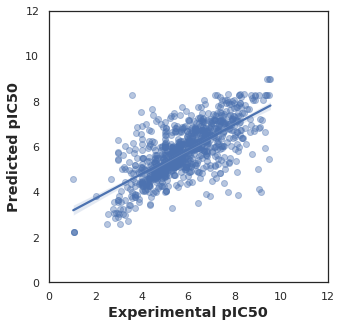

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## 5. Modelos de  Machine Learning 

In [19]:
!pip install lazypredict

  Using cached scikit_learn-0.23.1-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [21]:
pip uninstall scikit-learn -y


Found existing installation: scikit-learn 0.23.1
Uninstalling scikit-learn-0.23.1:
  Successfully uninstalled scikit-learn-0.23.1


In [22]:
pip install scikit-learn==0.23.1

  Using cached scikit_learn-0.23.1-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)


In [21]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [22]:


clf = LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
train,test= clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [01:18<00:00,  1.87s/it]


In [23]:
train.shape

(42, 4)

In [24]:
test.shape

(42, 4)

In [25]:
# Resultados para train (80%)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.34,0.43,1.14,0.41
HistGradientBoostingRegressor,0.34,0.43,1.14,9.67
RandomForestRegressor,0.33,0.43,1.15,5.48
BaggingRegressor,0.31,0.41,1.17,1.02
XGBRegressor,0.30,0.41,1.17,2.05
NuSVR,0.27,0.38,1.20,4.49
SVR,0.27,0.38,1.20,4.28
MLPRegressor,0.26,0.37,1.21,11.50
KNeighborsRegressor,0.23,0.35,1.23,1.62


In [31]:
test.to_excel("test_output.xlsx")

In [26]:
# Resultados para test (20%)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.34,0.43,1.14,0.41
HistGradientBoostingRegressor,0.34,0.43,1.14,9.67
RandomForestRegressor,0.33,0.43,1.15,5.48
BaggingRegressor,0.31,0.41,1.17,1.02
XGBRegressor,0.30,0.41,1.17,2.05
NuSVR,0.27,0.38,1.20,4.49
SVR,0.27,0.38,1.20,4.28
MLPRegressor,0.26,0.37,1.21,11.50
KNeighborsRegressor,0.23,0.35,1.23,1.62


[(0.0, 1.0)]

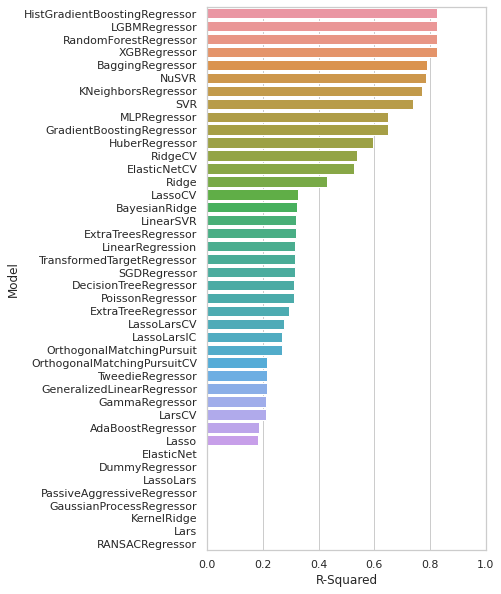

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

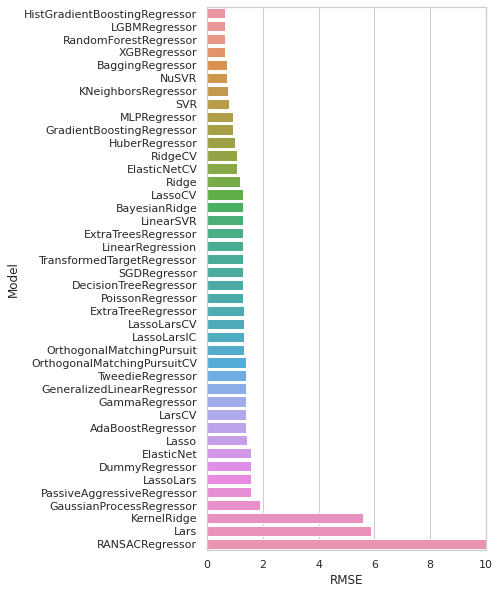

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

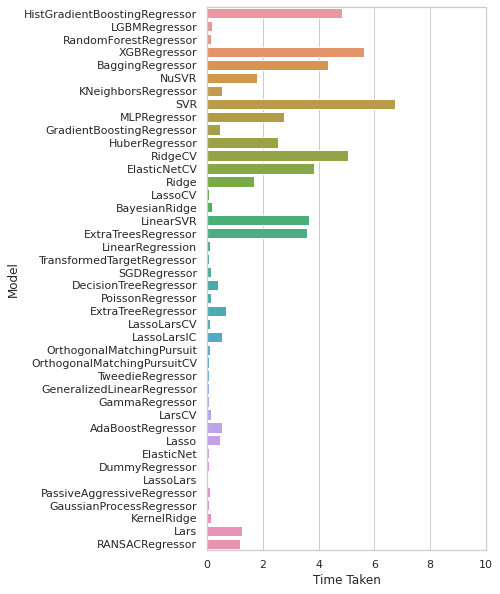

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

## Conclusión

El mejor modelo para predecir los valores de pIC50 HGBoostingRegressor. Sin embargo los resultados de r2 son tan bajos que no se debería usar hasta conseguir unos resultados por encima de 0.5. 

Para mejorar estos resultados deberiamos usar optimización de hiperparametros por lo menos en los 5 mejores modelos. 

Además podriamos hacer una selección de variables más exhaustiva ya que sólo que eliminado las que tienen menor varianza. 